In [ ]:
###################################################################################################
#--- Muhammed Uwais
#--- Eduv136908

In [ ]:
######################################## Question 3 ###############################################
#--- 3(a)



In [2]:
import pandas as pd

health_data_df = pd.read_csv("health_data.csv")

In [3]:
health_data_df.head()

,patient_id,age,sex,BMI,blood_pressure,disease_score
0,P0001,69,Female,20.3,106,89
1,P0002,32,Female,32.0,122,47
2,P0003,89,Male,24.9,98,84
3,P0004,78,Male,16.6,132,38
4,P0005,38,Male,19.6,137,99


In [4]:
health_data_df.describe()

,age,BMI,blood_pressure,disease_score
count,100.000000,100.000000,100.000000,100.000000
mean,52.870000,25.698000,133.460000,51.540000
std,21.901365,4.591626,25.393239,31.653879
min,18.000000,16.600000,90.000000,0.000000
25%,32.000000,22.000000,108.750000,23.000000
50%,53.500000,25.450000,137.500000,47.500000
75%,71.250000,28.975000,152.000000,83.250000
max,89.000000,38.700000,179.000000,100.000000


In [5]:
health_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      100 non-null    object 
 1   age             100 non-null    int64  
 2   sex             100 non-null    object 
 3   BMI             100 non-null    float64
 4   blood_pressure  100 non-null    int64  
 5   disease_score   100 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


In [6]:
risk_analysis_df = health_data_df[['age', 'BMI','sex', 'blood_pressure', 'disease_score']].copy()
risk_analysis_df.head()


,age,BMI,sex,blood_pressure,disease_score
0,69,20.3,Female,106,89
1,32,32.0,Female,122,47
2,89,24.9,Male,98,84
3,78,16.6,Male,132,38
4,38,19.6,Male,137,99


In [ ]:
######################################## Question 2 ###############################################
#--- 3(b)



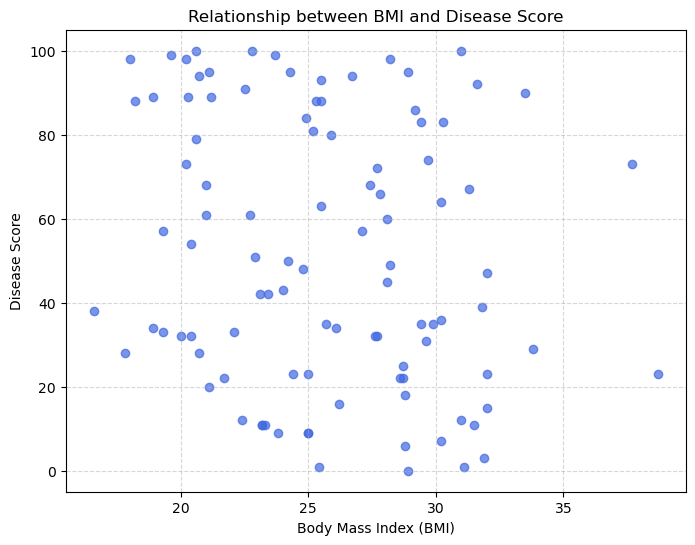

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(health_data_df['BMI'], health_data_df['disease_score'], color='royalblue', alpha=0.7)


plt.title('Relationship between BMI and Disease Score')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Score')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [ ]:
######################################## Question 3 ###############################################
#--- 3(c)



In [8]:
# My logic here is that I took the maximum Disease Score and divided into three numeric parts.
# The dividents are then classifed, The lowest being Low risk, The median being Medium risk and the highest being High Risk


max_score = health_data_df['disease_score'].max()

# creating the dividents 

threshold_1 = max_score / 3
threshold_2 = 2 * max_score / 3


def classify_risk(score):
    if score <= threshold_1:
        return 'Low Risk'
    elif score <= threshold_2:
        return 'Medium Risk'
    else:
        return 'High Risk'


health_data_df['risk_level'] = health_data_df['disease_score'].apply(classify_risk)

health_data_df.head()


,patient_id,age,sex,BMI,blood_pressure,disease_score,risk_level
0,P0001,69,Female,20.3,106,89,High Risk
1,P0002,32,Female,32.0,122,47,Medium Risk
2,P0003,89,Male,24.9,98,84,High Risk
3,P0004,78,Male,16.6,132,38,Medium Risk
4,P0005,38,Male,19.6,137,99,High Risk


In [ ]:
######################################## Question 3 ###############################################
#--- 3(d)



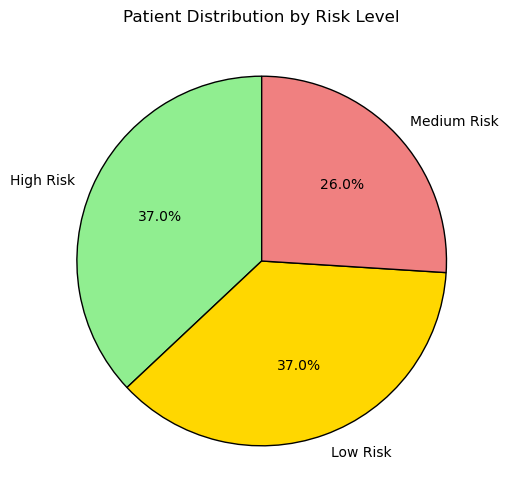

In [9]:
import matplotlib.pyplot as plt


risk_counts = health_data_df['risk_level'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(
    risk_counts,
    labels=risk_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'gold', 'lightcoral'],
    wedgeprops={'edgecolor': 'black'}
)


plt.title('Patient Distribution by Risk Level')
plt.show()


In [ ]:
######################################## Question 3 ###############################################
#--- 3(e)



In [12]:

# A important feature I thought about was a person who is positve for HIV, This disease highly impacts patients that have hgh blood or high disease scores.

import pandas as pd


hiv_feature = health_data_df.copy()

# added 5 dummy patients that are positive to the datset.

new_patients = pd.DataFrame({
    'patient_id': [f'P_HIV_{i}' for i in range(1, 6)],
    'age': [42, 36, 51, 47, 55],
    'sex': ['F', 'M', 'M', 'F', 'F'],
    'BMI': [29.4, 31.8, 27.2, 33.1, 30.5],
    'blood_pressure': [135, 142, 138, 145, 150],
    'disease_score': [68, 72, 65, 78, 80],
    'HIV_positive': [1, 1, 1, 1, 1]  # all HIV positive
})


hiv_feature = pd.concat([hiv_feature, new_patients], ignore_index=True)


hiv_feature['HIV_positive'] = hiv_feature.get('HIV_positive', 0).fillna(0).astype(int)

# Here I add adjusted score, if someone is HIV positive we add a 30% risk to hes/her profile.
hiv_feature['adjusted_disease_score'] = hiv_feature.apply(lambda row: row['disease_score'] * 1.3 if row['HIV_positive'] == 1 else row['disease_score'],axis=1)


max_score = hiv_feature['adjusted_disease_score'].max()
threshold_1 = max_score / 3
threshold_2 = 2 * max_score / 3

def classify_risk(score):
    if score <= threshold_1:
        return 'Low Risk'
    elif score <= threshold_2:
        return 'Medium Risk'
    else:
        return 'High Risk'


hiv_feature['risk_level'] = hiv_feature['adjusted_disease_score'].apply(classify_risk)


display(hiv_feature.tail(10))


,patient_id,age,sex,BMI,blood_pressure,disease_score,risk_level,HIV_positive,adjusted_disease_score
95,P0096,65,Male,33.8,151,29,Low Risk,0,29.0
96,P0097,40,Female,26.2,158,16,Low Risk,0,16.0
97,P0098,79,Female,21.0,165,61,Medium Risk,0,61.0
98,P0099,54,Female,30.3,105,83,High Risk,0,83.0
99,P0100,61,Female,25.3,179,88,High Risk,0,88.0
100,P_HIV_1,42,F,29.4,135,68,High Risk,1,88.4
101,P_HIV_2,36,M,31.8,142,72,High Risk,1,93.6
102,P_HIV_3,51,M,27.2,138,65,High Risk,1,84.5
103,P_HIV_4,47,F,33.1,145,78,High Risk,1,101.4
104,P_HIV_5,55,F,30.5,150,80,High Risk,1,104.0
